In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [ ]:
# make darknet (builds darknet so that i can use the darknet executable file to run or train object detectors)
!make

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
#Images can be uploaded from your Google Drive and easily have YOLOv4 detections run on them.
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
# this is where my datasets are stored within my Google Drive 
!ls /mydrive/yolov4/custom

In [ ]:
# copy over both datasets into the root directory of the Colab VM
!cp /mydrive/yolov4/custom/obj.zip ../
!cp /mydrive/yolov4/custom/test.zip ../

In [ ]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

These are the changes for the yolov4-obj.cfg file


I had batch = 64 and subdivisions = 16 for ultimate results.

Note: I set my max_batches = 12000, steps = 9600, 10800, I set the classes = 6 in the three YOLO layers and filters = 33 in the three convolutional layers before the YOLO layers.

How to Configure My Variables:

width = 416

height = 416 (these can be any multiple of 32, 416 is standard, you can sometimes improve results by making value larger like 608 but will slow down training)

max_batches = (# of classes) * 2000 (but no less than 6000 so if you are training for 1, 2, or 3 classes it will be 6000, however detector for 5 classes would have max_batches=10000)

steps = (80% of max_batches), (90% of max_batches) (so if your max_batches = 10000, then steps = 8000, 9000)

filters = (# of classes + 5) * 3 (so if you are training for one class then your filters = 18, but if you are training for 4 classes then your filters = 27)




In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4/yolov4-obj.cfg ./cfg


My obj.data file

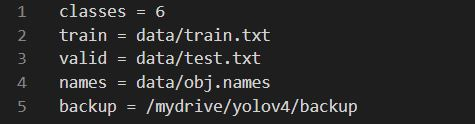


My obj.names file

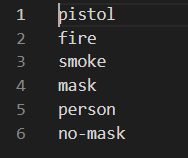

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

In [ ]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4/generate_train.py ./
!cp /mydrive/yolov4/generate_test.py ./

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
# train my custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

In [ ]:
# kick off training from where it last saved

!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights

In [ ]:
# need to set our custom cfg to test mode 
# %cd cfg
# !sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
# !sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
# %cd ..
#or create another file for test mode
!cp /mydrive/yolov4/yolov4-obj_test.cfg ./cfg

In [ ]:
#here i can run my custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj_test.cfg /mydrive/yolov4/backup/yolov4-obj_final.weights /mydrive/images/people.jpg -thresh 0.25
imShow('predictions.jpg')